In [164]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
import seaborn as sns
import pandas as pd
from scipy.stats import norm
import numpy as np
import datetime

### Wczytywanie danych 

In [180]:
df = pd.read_csv('D:/Projektiki/Dannyje/hotel_booking.csv')

In [181]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [183]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [184]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

children         4
country        488
agent        16340
company     112593
dtype: int64


Przyjrzyjmy się również procentowi brakujących wartości

In [185]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage[missing_percentage > 0])


children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64


### Analiza pierwotnych danych oraz ich przygotowanie
Dane zawierają 36 kolumn i 119390 wpisów

* `hotel` -- typ hotelu;
* `is_canceled` -- status anulowania (atrybut docelowy);
* `lead_time` -- czas przed przyjazdem;
* `arrival_date_year`, `arrival_date_month`, `arrival_date_week_number`, `arrival_date_day_of_month` -- data przyjazdu;
* `stays_in_weekend_nights`, `stays_in_week_nights` -- liczba noclegów w weekendy i dni powszednie;
* `adults`, `children`, `babies` -- liczba osób dorosłych, dzieci i niemowląt;
* `meal` -- rodzaj posiłku;
* `country` --  kraj klienta;
* `market_segment` -- segment rynku;
* `distribution_channel` -- kanał dystrybucji;
* `is_repeated_guest` -- stały klient;
* `previous_cancellations`, `previous_bookings_not_cancled` -- liczba wcześniejszych anulowanych i nieodwołanych rezerwacji;
* `reserved_room_type`, `assigned_room_type` -- typ zarezerwowanego i przydzielonego pokoju;
* `booking_changes` -- liczba zmian rezerwacji;
* `deposit_type` -- typ depozytu;
* `agent`, `company` -- identyfikatory agenta i firmy;
* `days_in_waiting_list` -- liczba dni na liście oczekujących;
* `customer_type` -- typ klienta;
* `adr` -- średnia stawka dzienna;
* `required_car_parking_spaces` -- liczba wymaganych miejsc parkingowych;
* `total_of_special_requests` -- całkowita liczba zamówień specjalnych;
* `reservation_status`, `reservation_status_date` -- status rezerwacji i data statusu;

##### W niektórych kolumnach istnieją brakujące wartości
`children`, `country`, `agent`, `company` trzeba dopełnić brakujące wartości

##### Ponadto, aby uprościć proces pracy z danymi, można usunąć niepotrzebne kolumny:
`name`, `email`, `phone-number`, `credit_card`



In [186]:
df['children'] = df['children'].fillna(0)
df['country'] = df['country'].fillna('Unknown')
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

df = df.drop(columns=['name', 'email', 'phone-number', 'credit_card'])

Sprawdźmy, czy nie ma duplikatów.

In [187]:
len(df[df.duplicated()])

31994

Usuniemy duplikaty

In [188]:
df = df.drop_duplicates()

In [189]:
df['is_canceled'] = df['is_canceled'].astype(bool)
df['is_repeated_guest'] = df['is_repeated_guest'].astype(bool)

Konwertowanie nazw miesięcy na wartości liczbowe

In [190]:
df['arrival_date_month'] = df['arrival_date_month'].map({'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7,'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})
     

In [191]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

Zmienimy typ danych dla kolumny `children`

In [192]:
df[['children']] = df[['children']].astype('int')

### EDA

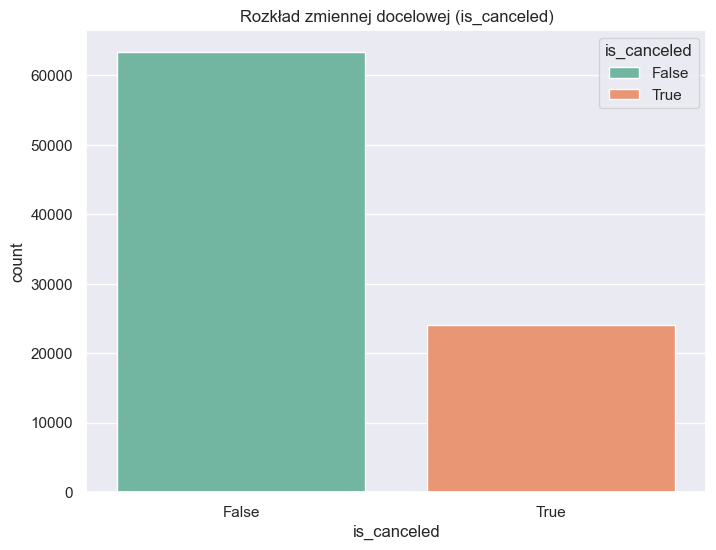

Procent anulowanych rezerwacji: 27.49%


In [193]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_canceled', hue='is_canceled', data=df, palette="Set2")
plt.title('Rozkład zmiennej docelowej (is_canceled)')
plt.show()

cancel_rate = df['is_canceled'].mean() * 100
print(f"Procent anulowanych rezerwacji: {cancel_rate:.2f}%")

Widzimy wyraźny brak równowagi klas w kolumnie `is_canceled` 

*Przyjrzyjmy się rezerwacjom w różnych typach hoteli*

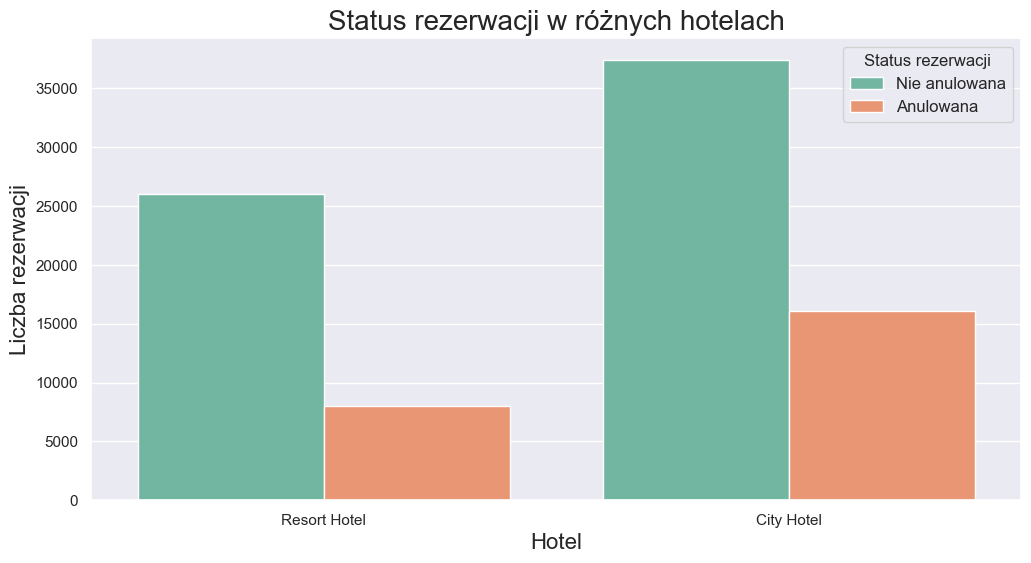

In [194]:
plt.figure(figsize=(12, 6))  

ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette="Set2")

ax1.legend(bbox_to_anchor=(1, 1), title="Status rezerwacji")

plt.title('Status rezerwacji w różnych hotelach', size=20)
plt.xlabel('Hotel', fontsize=16)
plt.ylabel('Liczba rezerwacji', fontsize=16)
plt.legend(['Nie anulowanа', 'Anulowana'], title='Status rezerwacji', fontsize=12)
plt.show()

================================

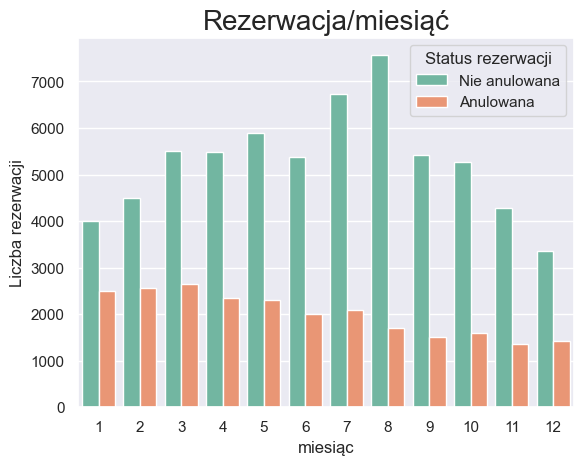

In [195]:
df['month']=df['reservation_status_date'].dt.month
ax1 = sns.countplot(x='month', hue='is_canceled', data= df, palette = 'Set2')
legend_lebels,_ = ax1.get_legend_handles_labels()
plt.title('Rezerwacja/miesiąć', size = 20)
plt.xlabel('miesiąc')
plt.ylabel('Liczba rezerwacji')
plt.legend(['Nie anulowanа','Anulowana'], title='Status rezerwacji')
plt.show()

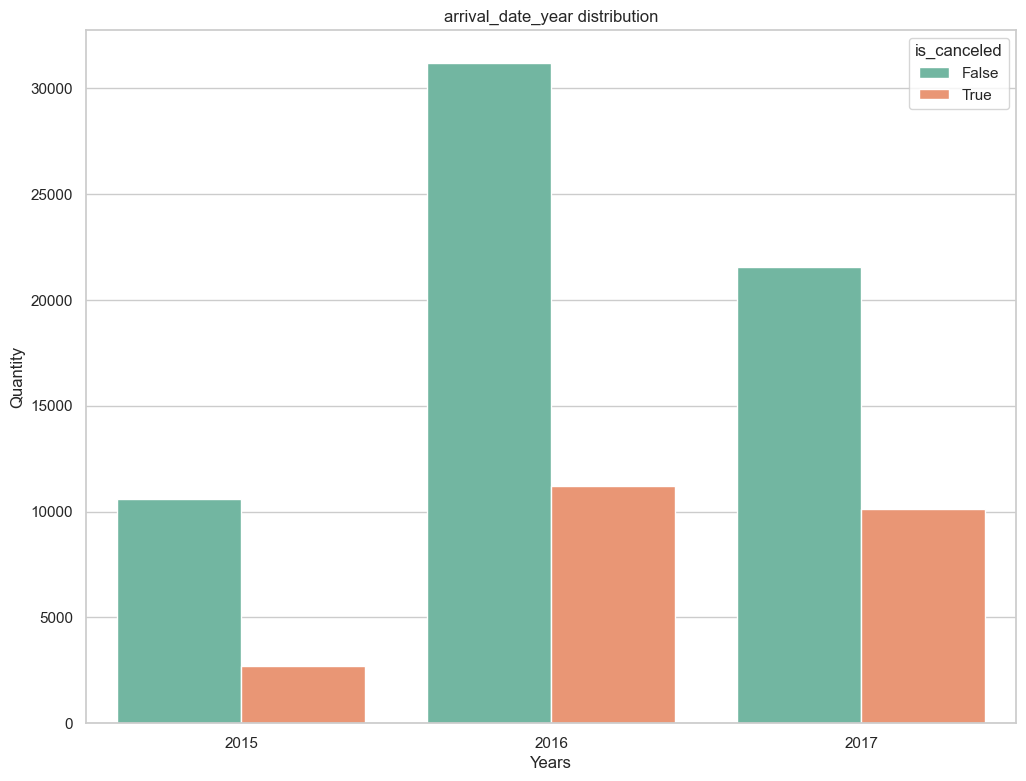

In [196]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 9))
sns.countplot(x='arrival_date_year', hue='is_canceled', data=df, palette = 'Set2')

plt.title('arrival_date_year distribution')
plt.xlabel('Years')
plt.ylabel('Quantity')

plt.show()

In [197]:
print(df['adults'].value_counts())
print(df['children'].value_counts()) 
print(df['babies'].value_counts())

adults
2     64497
1     16503
3      5935
0       385
4        60
26        5
5         2
27        2
20        2
40        1
55        1
50        1
6         1
10        1
Name: count, dtype: int64
children
0     79032
1      4695
2      3593
3        75
10        1
Name: count, dtype: int64
babies
0     86482
1       897
2        15
10        1
9         1
Name: count, dtype: int64


Najczęściej rezerwowany jest pokój dla 2 osób dorosłych.

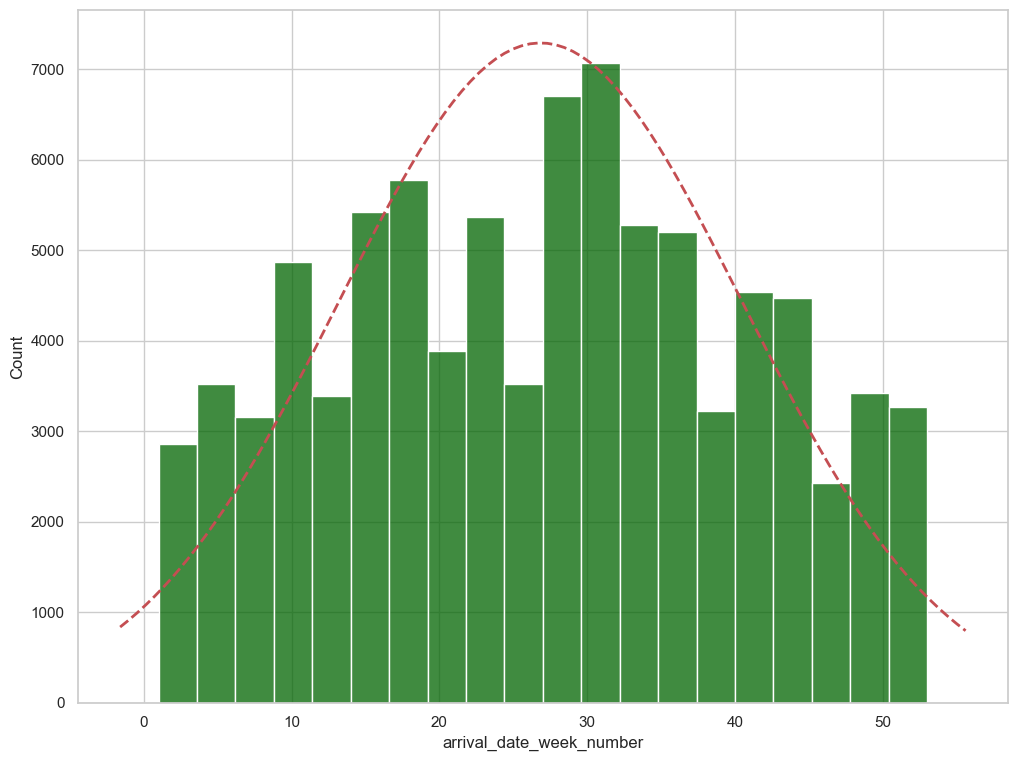

In [198]:
mu = df['arrival_date_week_number'].mean()
std = df['arrival_date_week_number'].std()

plt.figure(figsize=(12, 9))
sns.histplot(df['arrival_date_week_number'], bins=20, color='darkgreen', kde=False)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p * len(df['arrival_date_week_number']) * (xmax - xmin) / 20, 'r--', linewidth=2)

plt.show()


Dane w kolumnie `arrival_date_week_number` mają prawie normalny rozkład.

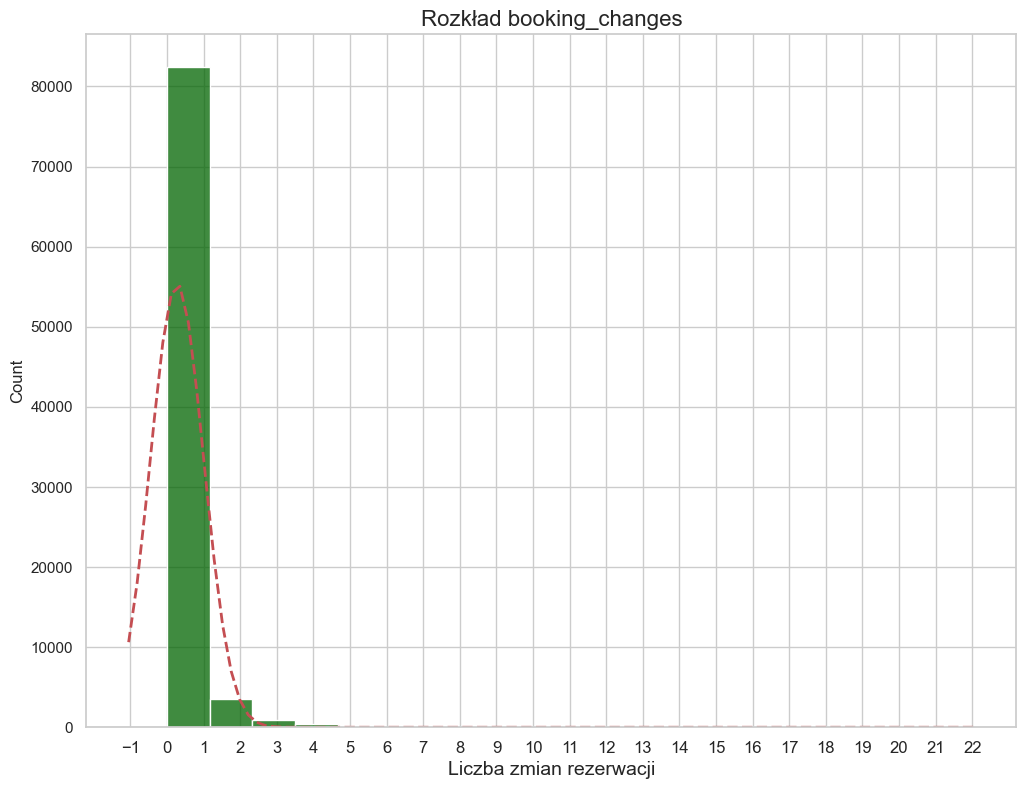

In [199]:
mu = df['booking_changes'].mean()
std = df['booking_changes'].std()

# Построить гистограмму данных
plt.figure(figsize=(12, 9))
sns.histplot(df['booking_changes'], color='darkgreen', kde=False)

# Добавить нормальное распределение
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p * len(df['booking_changes']) * (xmax - xmin) / 20, 'r--', linewidth=2)

plt.xticks(np.arange(int(xmin), int(xmax) + 1, 1))
plt.title('Rozkład booking_changes', fontsize=16)
plt.xlabel('Liczba zmian rezerwacji', fontsize=14)
plt.xticks(fontsize=12)
plt.grid(True)

plt.show()


W kolumnie `booking_changes` widzimy rozkład wykładniczy

##### Analiza krajów przybycia 
Istnieje wiele krajów z niewielką liczbą odwiedzin w kolumnie `country`, więc zachowajmy 12 krajów i przypiszmy wartość "inne" pozostałym.

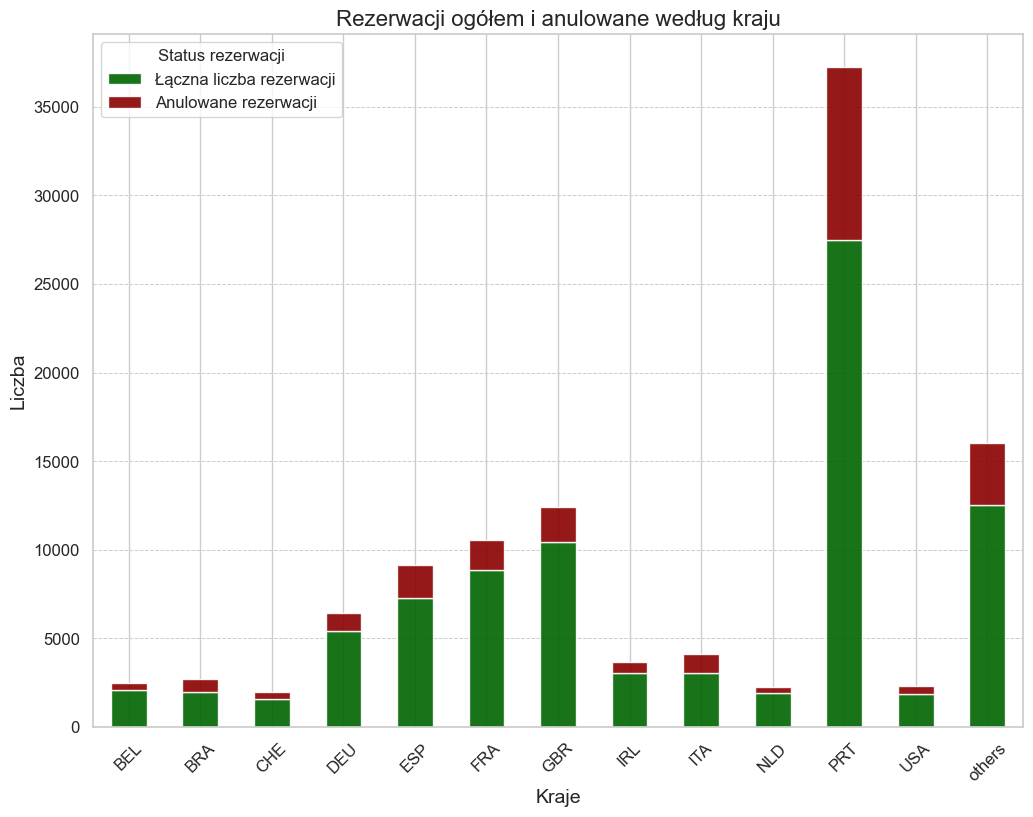

In [200]:
countries = ['PRT', 'FRA', 'GBR', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD', 'USA', 'CHE']
df['country'] = df['country'].apply(lambda x: 'others' if x not in countries else x)


total_orders = df['country'].value_counts()
canceled_orders = df[df['is_canceled'] == 1]['country'].value_counts()


df_stacked = pd.DataFrame({
    'Łączna liczba rezerwacji': total_orders,
    'Anulowane rezerwacji': canceled_orders
}).fillna(0)


df_stacked.plot(kind='bar', stacked=True, figsize=(12, 9), color=['darkgreen', 'darkred'], alpha=0.9)
plt.title('Rezerwacji ogółem i anulowane według kraju', fontsize=16)
plt.xlabel('Kraje', fontsize=14)
plt.ylabel('Liczba', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Status rezerwacji', fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.show()

Widać, że więcej rezerwacji (jak i ich anulowań) pochodzi od klientów z Portugalii

#### Analiza średniej stawki dziennej (adr) w zależności od zmiennych czasowych
Najperw przyjrzyjmy się zależności od miesiąca przybycia:

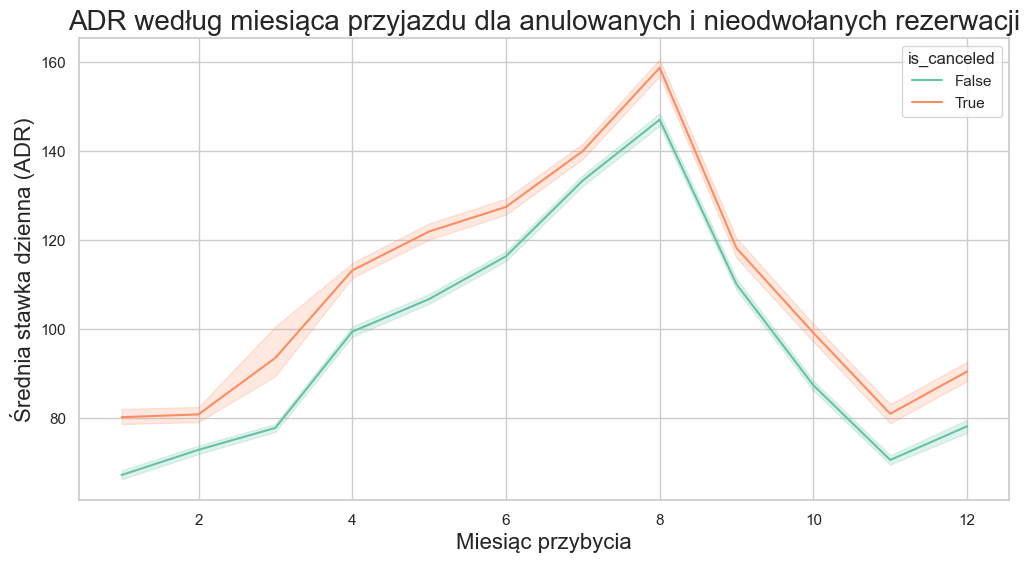

In [201]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='arrival_date_month', y='adr', hue='is_canceled', data=df, palette="Set2")

plt.title('ADR według miesiąca przyjazdu dla anulowanych i nieodwołanych rezerwacji', size=20)
plt.xlabel('Miesiąc przybycia', fontsize=16)
plt.ylabel('Średnia stawka dzienna (ADR)', fontsize=16)

plt.show()

1) *Średnia stawka dzienna (ADR)*:
    * Anulowane rezerwacje (pomarańczowa linia): W większości miesięcy średnia stawka dzienna jest wyższa w przypadku anulowanych rezerwacji w porównaniu z rezerwacjami nieodwołanymi.
    * Nieanulowane rezerwacje (zielona linia): Zwykle mają niższe średnie stawki dzienne.
2) *Wahania sezonowe*:
    * Oba rodzaje rezerwacji wykazują sezonowe wahania średniej stawki dziennej.
    * ADR rośnie od początku roku do lata (czerwiec-sierpień), a następnie spada pod koniec roku.
    * Średnia dzienna stawka jest najwyższa w lipcu i sierpniu dla obu typów rezerwacji.
3) *Różnica między anulowanymi i nieodwołanymi rezerwacjami*:
    * Różnica w średniej dziennej stawce między anulowanymi i nieodwołanymi rezerwacjami jest najbardziej widoczna między kwietniem a październikiem, kiedy ADR dla anulowanych rezerwacji jest znacznie wyższy.
    * Różnica jest mniejsza na początku i na końcu roku, ale ADR jest nadal wyższy w przypadku anulowanych rezerwacji.
Z tego możeny wnioskować, że:
    * Wysoka średnia stawka dzienna (ADR) koreluje z wyższym prawdopodobieństwem anulowania rezerwacji. Widać to po tym, że w okresach z wyższymi ADR liczba anulowanych rezerwacji jest również wyższa.
    * Wahania sezonowe wpływają na ADR i prawdopodobieństwo anulowania rezerwacji. Latem (w szczycie sezonu) średnia dzienna stawka jest wyższa, a co za tym idzie, liczba anulowanych rezerwacji jest wyższa.

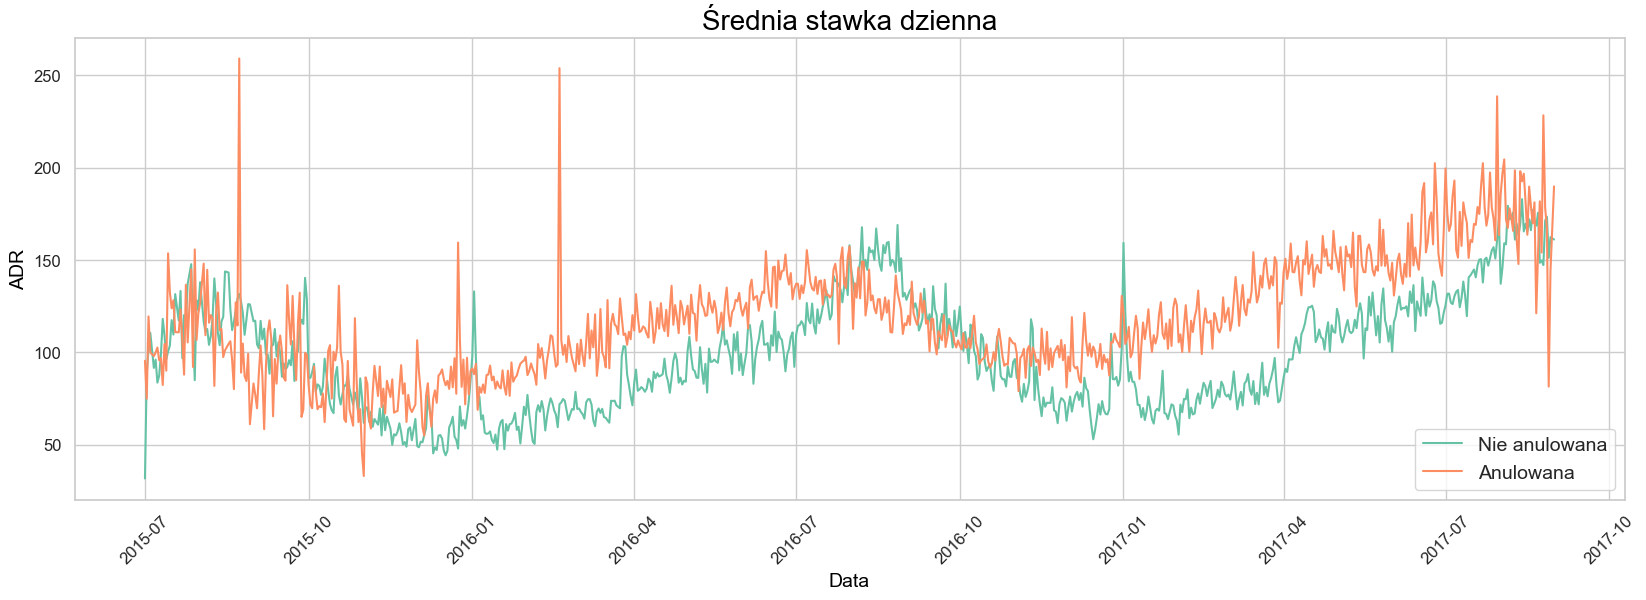

In [202]:
cancelled_data = df[df['is_canceled'] == 1]
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)


common_dates = pd.merge(cancelled_df_adr[['reservation_status_date']], not_cancelled_df_adr[['reservation_status_date']], on='reservation_status_date')


cancelled_df_adr = cancelled_df_adr[cancelled_df_adr['reservation_status_date'].isin(common_dates['reservation_status_date'])]
not_cancelled_df_adr = not_cancelled_df_adr[not_cancelled_df_adr['reservation_status_date'].isin(common_dates['reservation_status_date'])]


plt.figure(figsize=(20, 6))
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label='Nie anulowana', color='#66c2a5')  
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='Anulowana', color='#fc8d62')  
plt.title('Średnia stawka dzienna', fontsize=20, color="Black")
plt.xlabel('Data', fontsize=14, color="Black")
plt.ylabel('ADR', fontsize=14, color="Black")
plt.legend(fontsize=14)

# Ustawianie etykiet osi x dla co trzeciego miesiąca
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator(interval=3))
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))  

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()


Ogólnie rzecz biorąc, anulowane rezerwacje (pomarańczowa linia) mają zazwyczaj wyższe średnie stawki dzienne w porównaniu do nieodwołanych rezerwacji (zielona linia). Potwierdza to hipotezę, że rezerwacje są częściej anulowane, gdy średnia dzienna stawka jest wyższa. Obserwujemy sezonowe wahania ADR, które mogą być związane z wysokimi i niskimi sezonami w branży hotelarskiej. Na przykład szczyty pod koniec 2016 i 2017 roku.
Ten wykres pomaga wizualnie potwierdzić założenie, że prawdopodobieństwo anulowania wzrasta wraz z wyższymi średnimi stawkami dziennymi

#### Macierz korelacji cech numerycznych

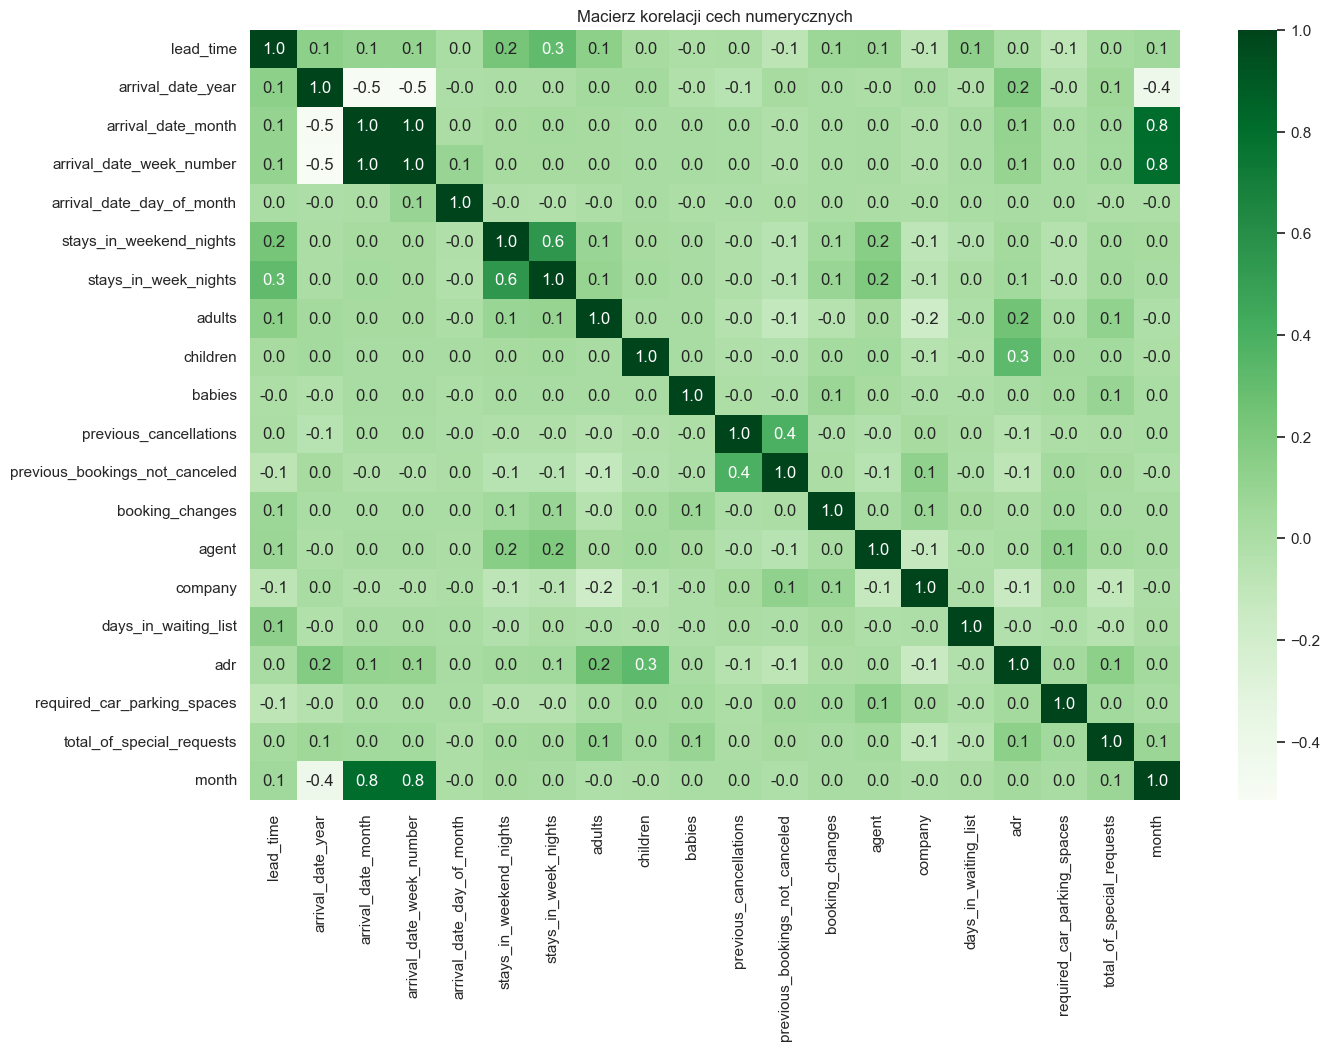

In [207]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap="Greens", annot=True, fmt=".1f")
plt.title('Macierz korelacji cech numerycznych')
plt.show()

Nie zaobserwowano żadnych oczywistych korelacji między kolumną docelową a pozostałymi. Zauważalna jest odwrotna korelacja między kolumnami `arrival_date_month` i `arrival_date_year`. Istnieją również znaczące korelacje między kolumną `total_nights` a kolumnami `stays_in_weekend_nights` i `stays_in_week_nights`. Istnieje również znacząca korelacja między kolumnami `previous_bookings_not_cancelled` i `is_repeated_guest`.

między kolumnami `arrival_data_month` i `arrival_date_week_number` korelacja 100%, usuńmy jedną z nich

In [208]:
df = df.drop(['arrival_date_week_number'], axis = 1)

##### Pokażmy rozkład atrybutów kategorycznych, które nie są jeszcze reprezentowane

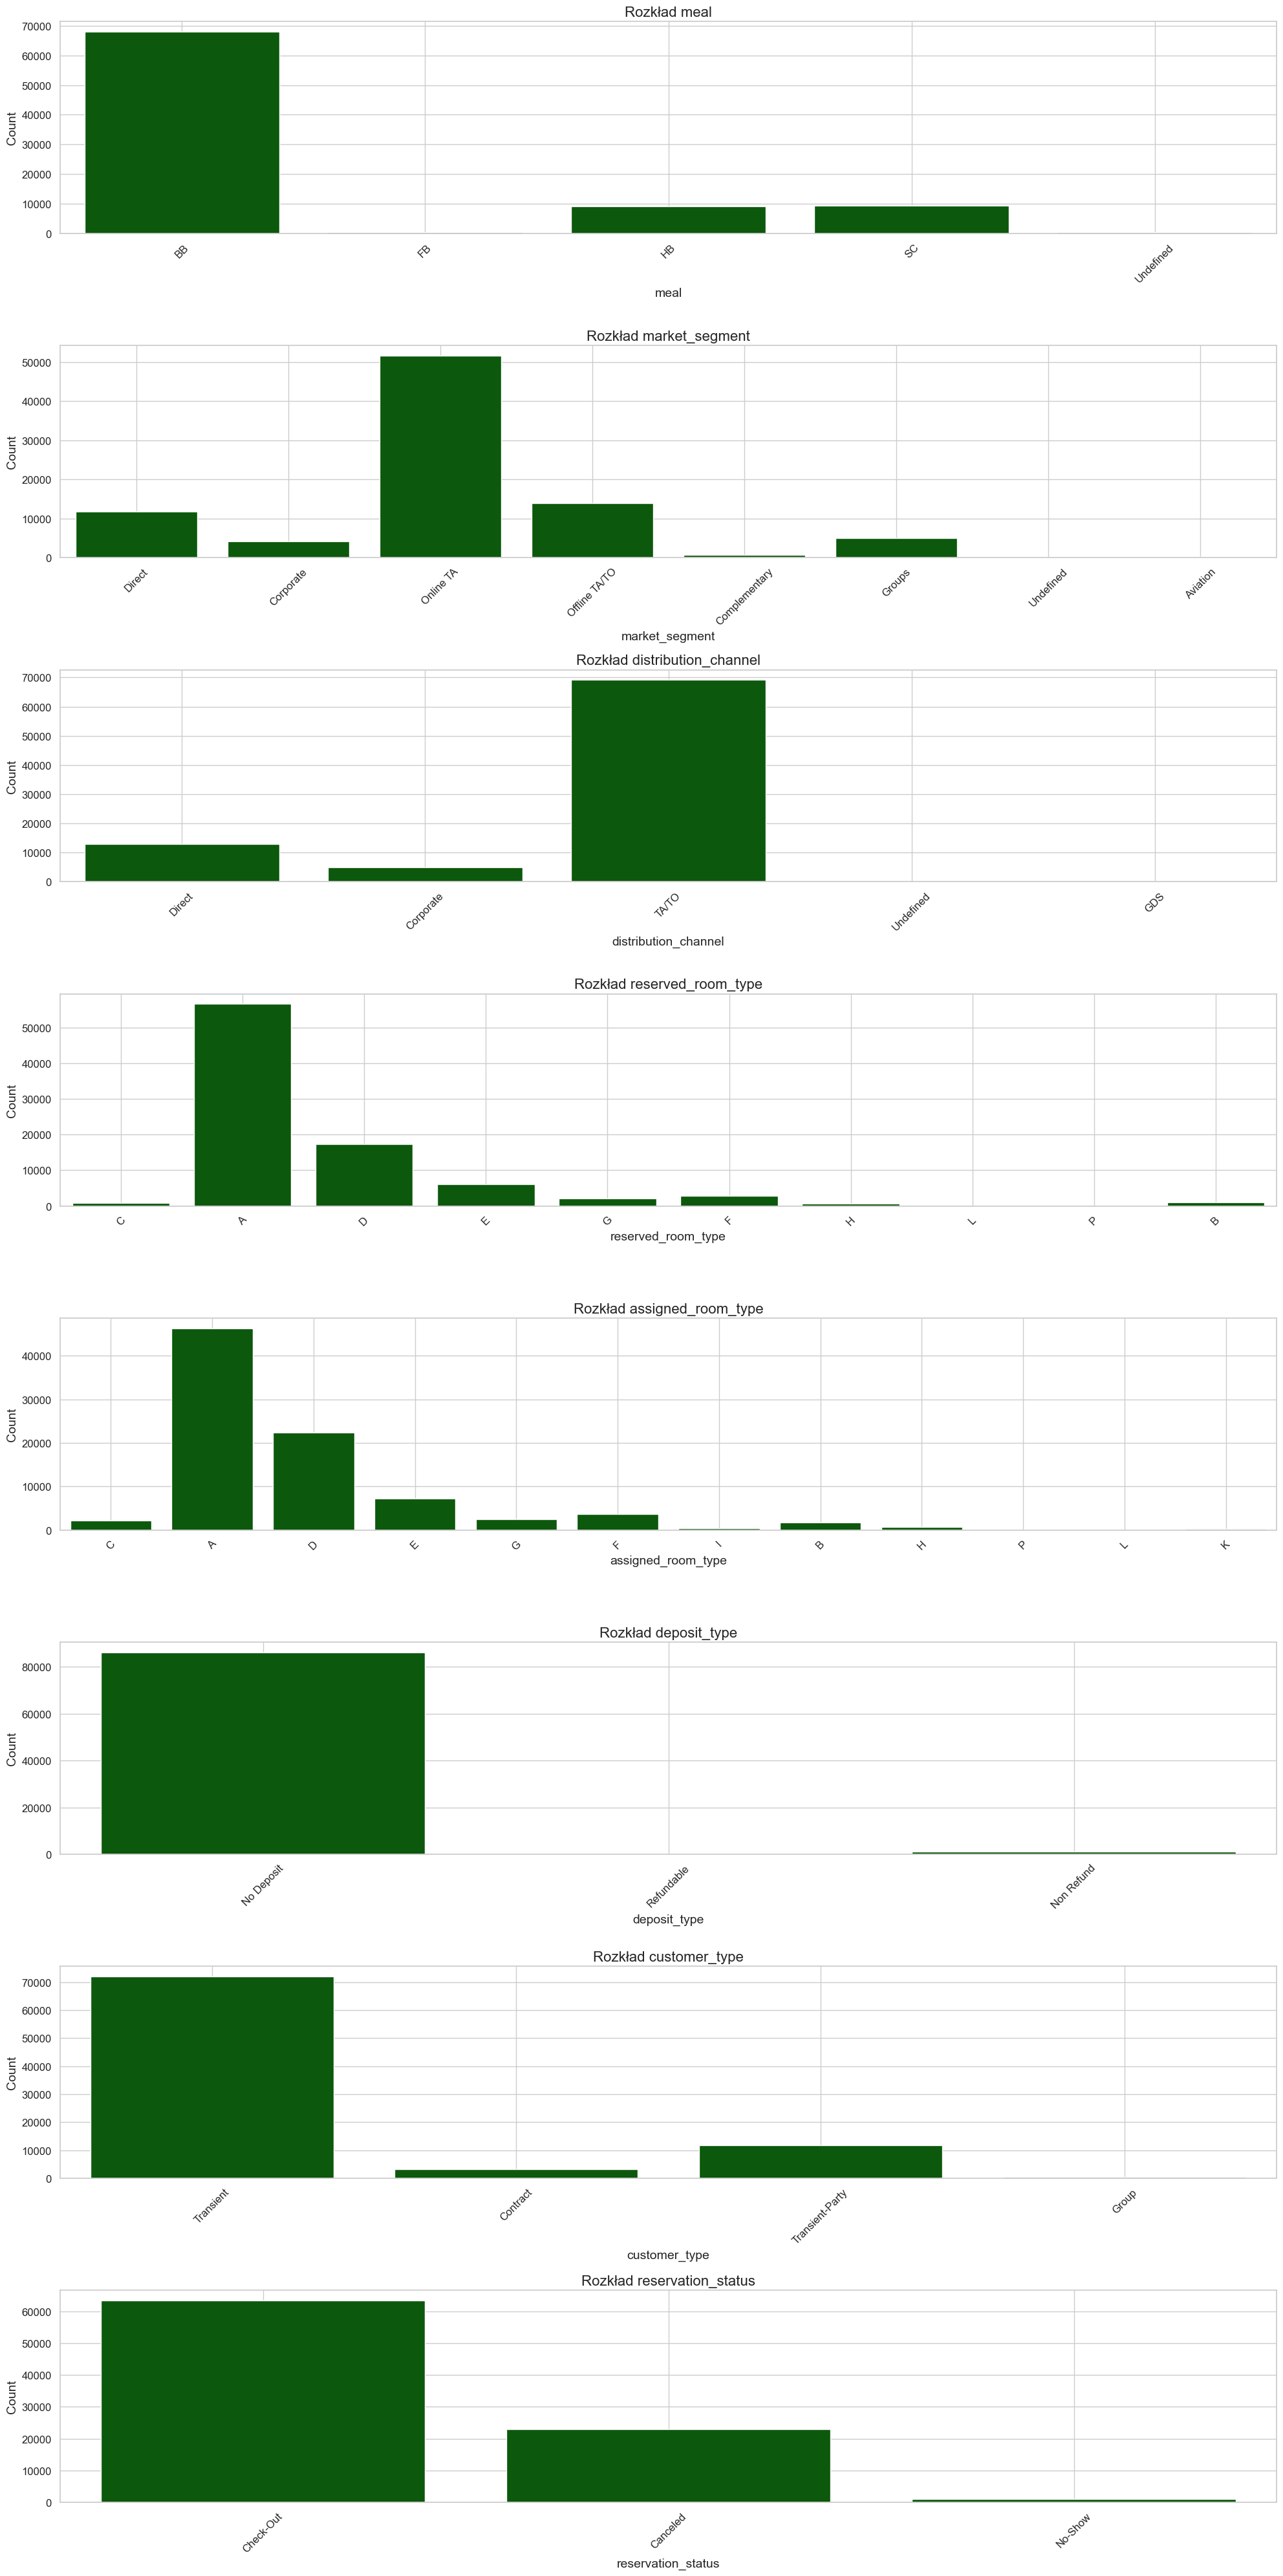

In [209]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop(['hotel', 'country'])

plt.figure(figsize=(20, len(categorical_features) * 5))

for i, col in enumerate(categorical_features):
    plt.subplot(len(categorical_features), 1, i + 1)
    sns.countplot(data=df, x=col, color='darkgreen')
    plt.title(f'Rozkład {col}', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.show()

### Przejdźmy do stworzenia modelu określającego prawdopodobieństwo anulowania rezerwacji 